In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#PARAMETERS:

#Masses:
m1=5 ; m2=1 ; m3=2 ; m4=4 ; m5=6

#Spring constants:
c1=1 ; c2=5 ; c3=3 ; c4=4 ; c5=3

#Damping constants:
g1=0.1 ; g2=0.3 ; g3=0.2 ; g4=0.1 ; g5=0.2

#----------------------------------------------------------------------------------------

#INITIAL CONDITIONS:

#Initial Conditions 1:
u11=0. ; u21=0. ; u31=0. ; u41=0. ; u51=1.
du11=0. ; du21=0. ; du31=0. ; du41=0. ; du51=0.

ic1m=[u11,u21,u31,u41,u51,du11,du21,du31,du41,du51]

#Initial Conditions 2:
u12=0. ; u22=0. ; u32=0. ; u42=0. ; u52=0.
du12=0. ; du22=1. ; du32=0. ; du42=0. ; du52=0.

ic2m=[u12,u22,u32,u42,u52,du12,du22,du32,du42,du52]

#Initial Conditions 3:
u13=0. ; u23=0. ; u33=0. ; u43=0. ; u53=1.
du13=0. ; du23=1. ; du33=0. ; du43=0. ; du53=0.
      
ic3m=[u13,u23,u33,u43,u53,du13,du23,du33,du43,du53]

In [3]:
def setAnchor(sol,steps):
    #anchor points below y=0
    anch = [2,4,6,8,10]
    #list to store modified solutions
    y_list = []
    
    #change solution anchorpoints
    for i in range(0,10):
        if(i<5):
            for j in range(0,steps):
                sol[i,j] = sol[i,j]-anch[i]
        y_list.append(sol[i])
    return y_list

In [4]:
def spring3D(a,b,pos):
    A = 1/50
    w = 5
    dt = b-a
    T = np.linspace(0,dt,100)
    
    X = A*np.cos(w/dt*2*np.pi*T)+pos
    Y = A*np.sin(w/dt*2*np.pi*T)
    Z = T
    
    return [X,Y,Z+a]

In [5]:
#Plot Displacement and Velocity vs. Time
def graph33(T,Y,tNum):
    titleList331 = ["Displacements of Damped and Forced System (Ini. Cond. 1)","Velocities of Damped and Forced System (Ini. Cond. 1)"]
    titleList332 = ["Displacements of Damped and Forced System (Ini. Cond. 2)","Velocities of Damped and Forced System (Ini. Cond. 2)"]
    titleList333 = ["Displacements of Damped and Forced System (Ini. Cond. 3)","Velocities of Damped and Forced System (Ini. Cond. 3)"]
    titles33 = [titleList331,titleList332,titleList333]
    
    #Displacement vs. Time
    for i in range(0,5):
        plt.rcParams['font.family'] = 'serif'
        plt.plot(T, Y[i], label = "u"+'{:01d}'.format(i+1))
        
    plt.title(titles33[tNum][0])
    plt.xlabel("Time", size=11.5)
    plt.ylabel("Displacement", size=11.5)
    plt.grid()
    plt.legend(loc=1)
    #plt.savefig('Graphs/Graphs3/D{:01d}.pdf'.format(tNum+1)) << Uncomment to save graphs to a location
    plt.show()

    #Velocity vs. Time
    for i in range(5,10):
        plt.plot(T, Y[i], label = "v"+'{:01d}'.format(i-4))
        plt.rcParams['font.family'] = 'serif'
    plt.title(titles33[tNum][1])
    plt.xlabel("Time", size=11.5)
    plt.ylabel("Velocity", size=11.5)
    plt.grid()
    plt.legend(loc=1)
    #plt.savefig('Graphs/Graphs3/V{:01d}.pdf'.format(tNum+1)) << Uncomment to save graphs to a location
    plt.show()

In [6]:
#3.3 DAMPED & FORCED
#The Parameter Matrix P
m33 = [[0,0,0,0,0,1,0,0,0,0],
       [0,0,0,0,0,0,1,0,0,0],
       [0,0,0,0,0,0,0,1,0,0],
       [0,0,0,0,0,0,0,0,1,0],
       [0,0,0,0,0,0,0,0,0,1],
       [(-c1-c2)/m1,(c2)/m1,0,0,0,-g1/m1,0,0,0,0],
       [(c2)/m2,(-c2-c3)/m2,(c3)/m2,0,0,0,-g2/m2,0,0,0],
       [0,(c3)/m3,(-c3-c4)/m3,(c4)/m3,0,0,0,-g3/m3,0,0],
       [0,0,(c4)/m4,(-c4-c5)/m4,(c5)/m4,0,0,0,-g4/m4,0],
       [0,0,0,(c5)/m5,(-c5)/m5,0,0,0,0,-g5/m5]]

In [7]:
#3.3 Set up Linspace and Time Interval
steps = 3000
t = np.linspace(0.0, 180.0, steps)
ts = (0,180)

In [8]:
#3.3 System of Differential Equations
def DE33(t,y):
    #driving force vector g(t)
    g = [0,0,0,0,0,0/m1,0/m2,0/m3,0/m4,(2.0*np.sin(t))/m5]
    return np.matmul(m33,y) + g

In [9]:
#Numerical Solutions for Initial Conditions 1,2 and 3
sol45y331 = solve_ivp(DE33, ts, ic1m, t_eval=t, method='RK45')
sol45y332 = solve_ivp(DE33, ts, ic2m, t_eval=t, method='RK45')
sol45y333 = solve_ivp(DE33, ts, ic3m, t_eval=t, method='RK45')

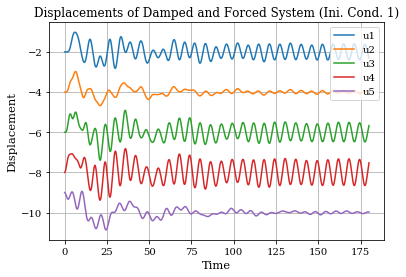

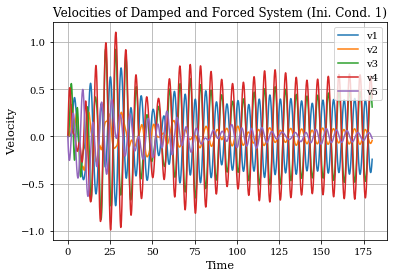

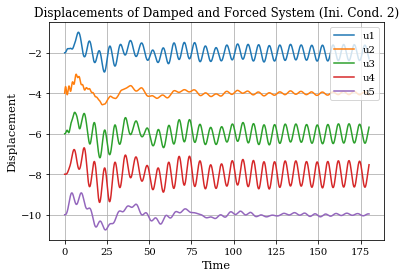

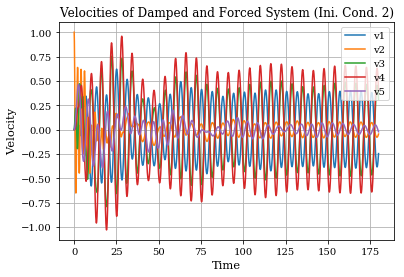

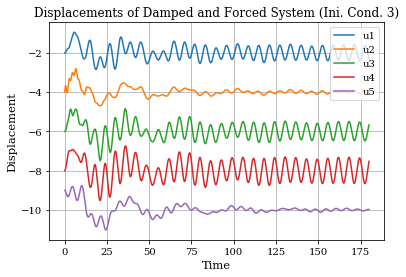

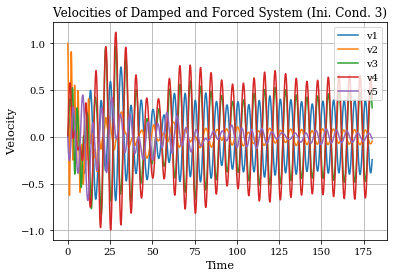

In [10]:
#3.3 Damped and Forced System Graphs
sol331 = setAnchor(sol45y331.y,steps)
sol332 = setAnchor(sol45y332.y,steps)
sol333 = setAnchor(sol45y333.y,steps)

#Graphs
graph33(t,sol331,0) #INITIAL CONDITION 1
graph33(t,sol332,1) #INITIAL CONDITION 2
graph33(t,sol333,2) #INITIAL CONDITION 3

<IPython.core.display.Javascript object>


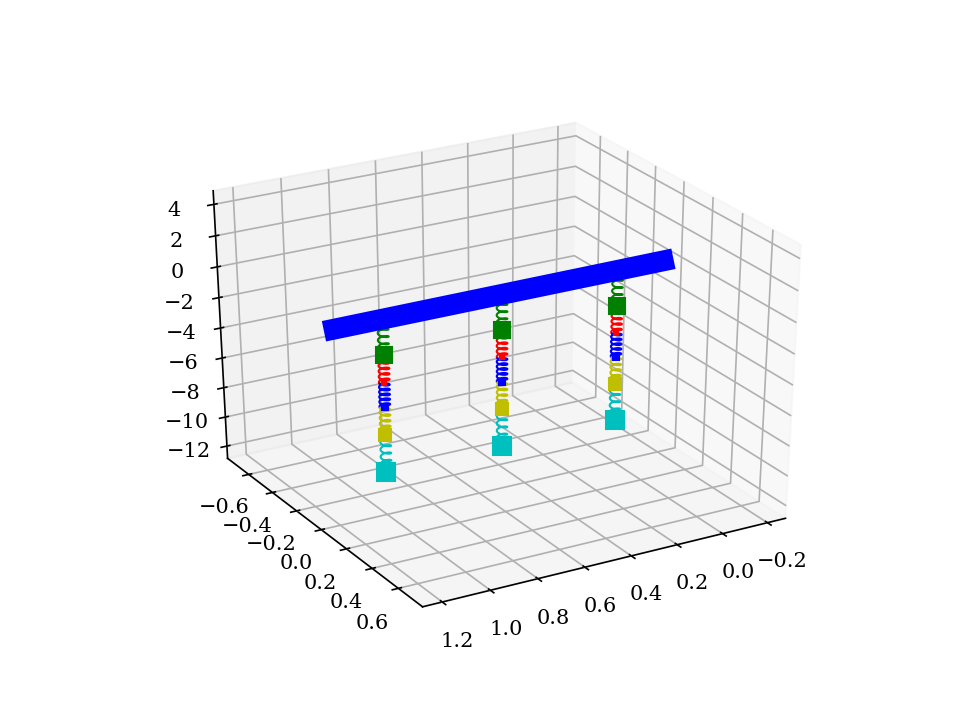

In [12]:
#3.3 Animation for Damped and Forced System     
%matplotlib notebook
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d', autoscale_on=False, xlim=(-0.25, 1.25), ylim=(-0.75, 0.75), zlim=(-12.5, 4.5))
ax.view_init(30, 60)
ax.grid()

#dt = 60/1000

#Plot Elements

#INITIAL CONDITION 1
spring1, = ax.plot([], [], [], 'g-', lw=1)
spring2, = ax.plot([], [], [], 'r-', lw=1)
spring3, = ax.plot([], [], [], 'b-', lw=1)
spring4, = ax.plot([], [], [], 'y-', lw=1)
spring5, = ax.plot([], [], [], 'c-', lw=1)
mass1, = ax.plot([], [], [], 'gs', markersize = 1.5*m1)
mass2, = ax.plot([], [], [], 'rs', markersize = 1.5*m2)
mass3, = ax.plot([], [], [], 'bs', markersize = 1.5*m3)
mass4, = ax.plot([], [], [], 'ys', markersize = 1.5*m4)
mass5, = ax.plot([], [], [], 'cs', markersize = 1.5*m5)

#INITIAL CONDITION 2
spring6, = ax.plot([], [], [], 'g-', lw=1)
spring7, = ax.plot([], [], [], 'r-', lw=1)
spring8, = ax.plot([], [], [], 'b-', lw=1)
spring9, = ax.plot([], [], [], 'y-', lw=1)
spring10, = ax.plot([], [], [], 'c-', lw=1)
mass6, = ax.plot([], [], [], 'gs', markersize = 1.5*m1)
mass7, = ax.plot([], [], [], 'rs', markersize = 1.5*m2)
mass8, = ax.plot([], [], [], 'bs', markersize = 1.5*m3)
mass9, = ax.plot([], [], [], 'ys', markersize = 1.5*m4)
mass10, = ax.plot([], [], [], 'cs', markersize = 1.5*m5)

#INITIAL CONDITION 3
spring11, = ax.plot([], [], [], 'g-', lw=1)
spring12, = ax.plot([], [], [], 'r-', lw=1)
spring13, = ax.plot([], [], [], 'b-', lw=1)
spring14, = ax.plot([], [], [], 'y-', lw=1)
spring15, = ax.plot([], [], [], 'c-', lw=1)
mass11, = ax.plot([], [], [], 'gs', markersize = 1.5*m1)
mass12, = ax.plot([], [], [], 'rs', markersize = 1.5*m2)
mass13, = ax.plot([], [], [], 'bs', markersize = 1.5*m3)
mass14, = ax.plot([], [], [], 'ys', markersize = 1.5*m4)
mass15, = ax.plot([], [], [], 'cs', markersize = 1.5*m5)

bar, = ax.plot([], [], [], 'b-', lw=10)
#TEXT

def animate(i):
    
    bar.set_data([-0.2,1.2],[0.0,0.0])
    bar.set_3d_properties([0.0,0.0])
    
    #Initial Condition 1 pos=0.0
    xpos1 = 0.0
    
    x1,y1,z1 = spring3D(0.0,sol331[0][i],xpos1)
    spring1.set_data(x1,y1)
    spring1.set_3d_properties(z1)
    
    x2,y2,z2 = spring3D(sol331[0][i],sol331[1][i],xpos1)
    spring2.set_data(x2,y2)
    spring2.set_3d_properties(z2)
    
    x3,y3,z3 = spring3D(sol331[1][i],sol331[2][i],xpos1)
    spring3.set_data(x3,y3)
    spring3.set_3d_properties(z3)
    
    x4,y4,z4 = spring3D(sol331[2][i],sol331[3][i],xpos1)
    spring4.set_data(x4,y4)
    spring4.set_3d_properties(z4)
    
    x5,y5,z5 = spring3D(sol331[3][i],sol331[4][i],xpos1)
    spring5.set_data(x5,y5)
    spring5.set_3d_properties(z5)
    
    mass1.set_data(xpos1,0.0)
    mass1.set_3d_properties(sol331[0][i])
    
    mass2.set_data(xpos1,0.0)
    mass2.set_3d_properties(sol331[1][i])
    
    mass3.set_data(xpos1,0.0)
    mass3.set_3d_properties(sol331[2][i])
    
    mass4.set_data(xpos1,0.0)
    mass4.set_3d_properties(sol331[3][i])
    
    mass5.set_data(xpos1,0.0)
    mass5.set_3d_properties(sol331[4][i])
    
    #Initial Condition 2 pos=0.5
    xpos2 = 0.5
    
    x6,y6,z6 = spring3D(0.0,sol332[0][i],xpos2)
    spring6.set_data(x6,y6)
    spring6.set_3d_properties(z6)
    
    x7,y7,z7 = spring3D(sol332[0][i],sol332[1][i],xpos2)
    spring7.set_data(x7,y7)
    spring7.set_3d_properties(z7)
    
    x8,y8,z8 = spring3D(sol332[1][i],sol332[2][i],xpos2)
    spring8.set_data(x8,y8)
    spring8.set_3d_properties(z8)
    
    x9,y9,z9 = spring3D(sol332[2][i],sol332[3][i],xpos2)
    spring9.set_data(x9,y9)
    spring9.set_3d_properties(z9)
    
    x10,y10,z10 = spring3D(sol332[3][i],sol332[4][i],xpos2)
    spring10.set_data(x10,y10)
    spring10.set_3d_properties(z10)
    
    mass6.set_data(xpos2,0.0)
    mass6.set_3d_properties(sol332[0][i])
    
    mass7.set_data(xpos2,0.0)
    mass7.set_3d_properties(sol332[1][i])
    
    mass8.set_data(xpos2,0.0)
    mass8.set_3d_properties(sol332[2][i])
    
    mass9.set_data(xpos2,0.0)
    mass9.set_3d_properties(sol332[3][i])
    
    mass10.set_data(xpos2,0.0)
    mass10.set_3d_properties(sol332[4][i])
    
    #Initial Condition 1 pos=1.0
    xpos3 = 1.0
    
    x11,y11,z11 = spring3D(0.0,sol333[0][i],xpos3)
    spring11.set_data(x11,y11)
    spring11.set_3d_properties(z11)
    
    x12,y12,z12 = spring3D(sol333[0][i],sol333[1][i],xpos3)
    spring12.set_data(x12,y12)
    spring12.set_3d_properties(z12)
    
    x13,y13,z13 = spring3D(sol333[1][i],sol333[2][i],xpos3)
    spring13.set_data(x13,y13)
    spring13.set_3d_properties(z13)
    
    x14,y14,z14 = spring3D(sol333[2][i],sol333[3][i],xpos3)
    spring14.set_data(x14,y14)
    spring14.set_3d_properties(z14)
    
    x15,y15,z15 = spring3D(sol333[3][i],sol333[4][i],xpos3)
    spring15.set_data(x15,y15)
    spring15.set_3d_properties(z15)
    
    mass11.set_data(xpos3,0.0)
    mass11.set_3d_properties(sol333[0][i])
    
    mass12.set_data(xpos3,0.0)
    mass12.set_3d_properties(sol333[1][i])
    
    mass13.set_data(xpos3,0.0)
    mass13.set_3d_properties(sol333[2][i])
    
    mass14.set_data(xpos3,0.0)
    mass14.set_3d_properties(sol333[3][i])
    
    mass15.set_data(xpos3,0.0)
    mass15.set_3d_properties(sol333[4][i])
    
    return spring1, spring2, spring3, spring4, spring5, spring6, spring7, spring8, spring9, spring10, spring11, spring12, spring13, spring14, spring15, mass1, mass2, mass3, mass4, mass5, mass6, mass7, mass8, mass9, mass10, mass11, mass12, mass13, mass14, mass15, bar
ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
                             interval=20, blit=True)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=24, metadata=dict(artist='Me'), bitrate=1800)
ani.save('../Animations-3D/3DSpring3.mp4', writer=writer, dpi=400)